In [31]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input450sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0.001,0.4,0.06)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
accuracy_10_samples = np.zeros((10,10,10))


1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.99609375
1.0
1.0


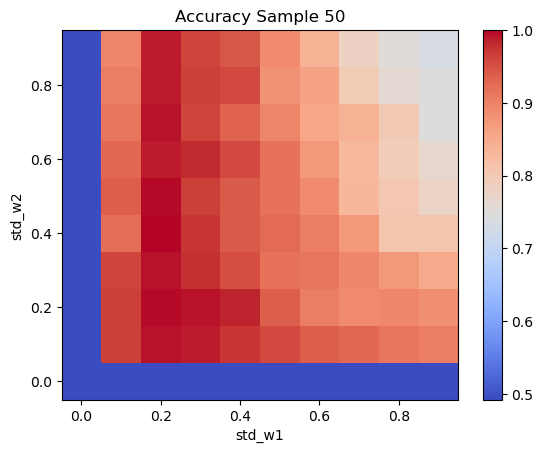

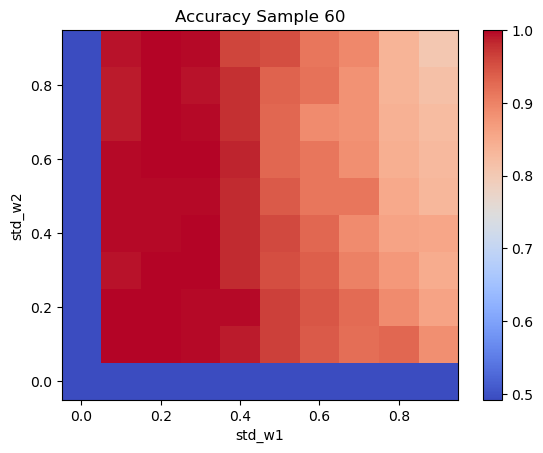

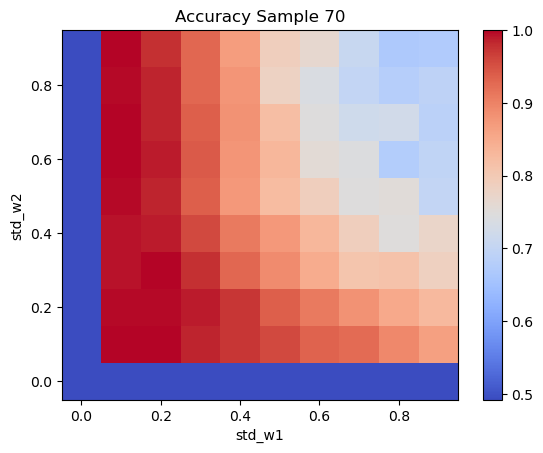

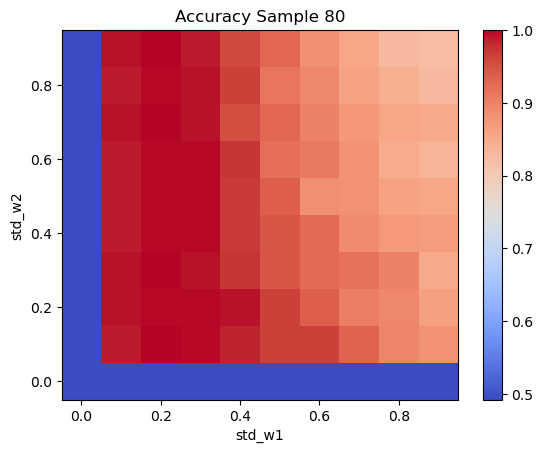

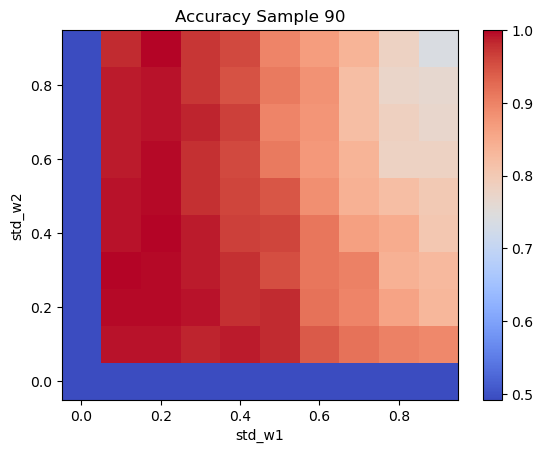

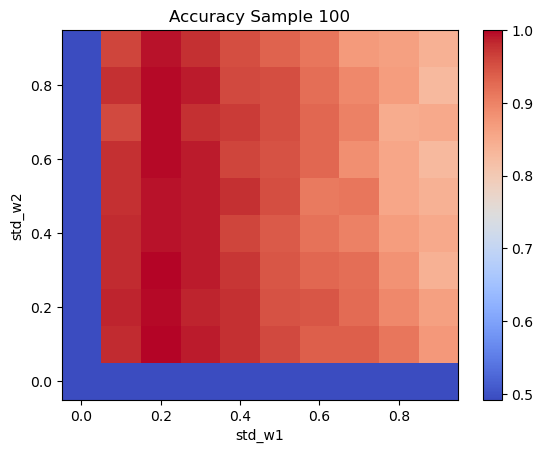

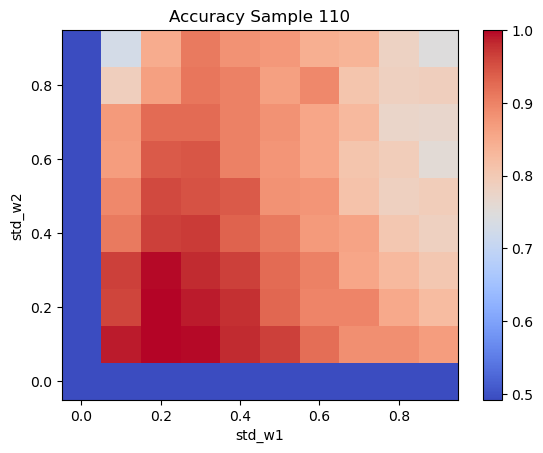

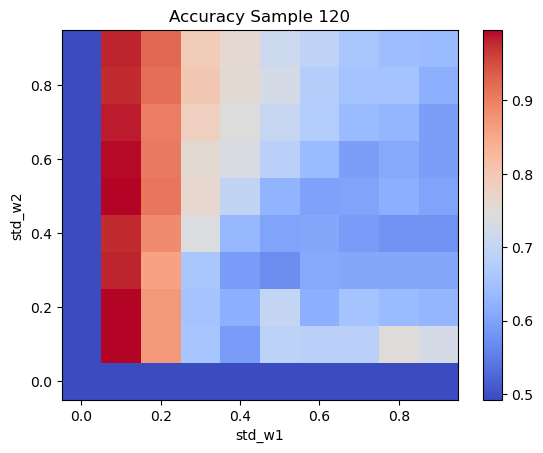

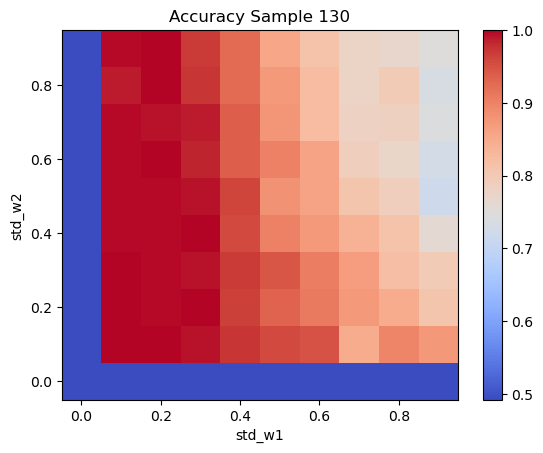

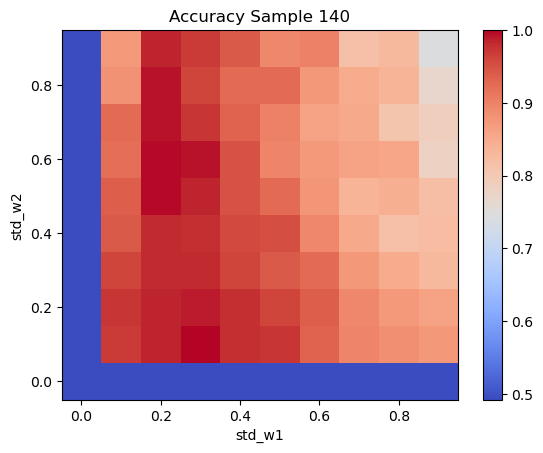

In [32]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes()
    b = ax.pcolormesh(axis_std_w1, axis_std_w2, data['accuracy_w1_w2'].T, cmap ='coolwarm')
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Accuracy Sample {}'.format(sample))
    fig.savefig("accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]
    max_accuracy = np.max(accuracy_10_samples[i])
    index_max_accuracy = np.argmax(accuracy_10_samples[i])
    test_best_w1_w2 = np.unravel_index(index_max_accuracy, accuracy_10_samples[i].shape)
    test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005
    print(max_accuracy)



In [33]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)
std_dev_accuracy_grid_10_by_10_10_samples = np.std(accuracy_10_samples, axis=0)

In [34]:
average_accuracy_grid_10_by_10_10_samples

array([[0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ,
        0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ],
       [0.4921875 , 0.98789063, 0.98632812, 0.98242188, 0.96953125,
        0.97109375, 0.965625  , 0.96171875, 0.94804687, 0.93984375],
       [0.4921875 , 0.98398438, 0.98320312, 0.98203125, 0.98007813,
        0.98203125, 0.98085937, 0.97773438, 0.97304687, 0.97148437],
       [0.4921875 , 0.95820313, 0.9578125 , 0.95351562, 0.95859375,
        0.95507812, 0.95625   , 0.95195312, 0.94882813, 0.94648438],
       [0.4921875 , 0.94023437, 0.94335938, 0.92695313, 0.92070312,
        0.925     , 0.9234375 , 0.91992188, 0.91953125, 0.91523438],
       [0.4921875 , 0.93632812, 0.92578125, 0.89882812, 0.89726562,
        0.88359375, 0.88242188, 0.8796875 , 0.87617188, 0.87304688],
       [0.4921875 , 0.91445312, 0.89257812, 0.88125   , 0.86679688,
        0.84921875, 0.8484375 , 0.84140625, 0.8484375 , 0.84375   ],
       [0.4921875 , 0.88828125, 0.8746093

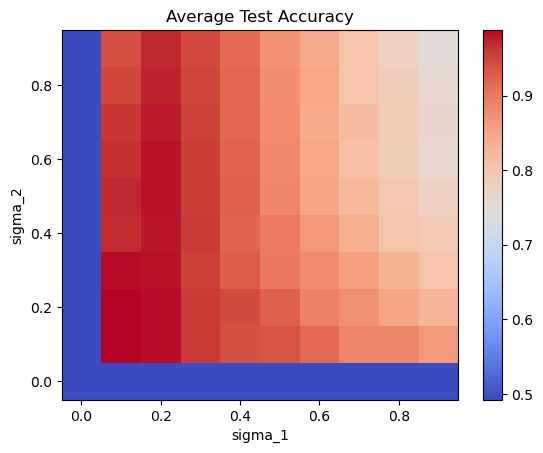

In [35]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, average_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm')
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_accuracy_grid_450_0.1.png".format(sample))

In [36]:
average_accuracy_grid_10_by_10_10_samples >= 0.95*np.max(average_accuracy_grid_10_by_10_10_samples)

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [37]:
test1 = average_accuracy_grid_10_by_10_10_samples >= 0.95*np.max(average_accuracy_grid_10_by_10_10_samples)

test2 = np.sort(np.extract(test1, average_accuracy_grid_10_by_10_10_samples))

test3 = np.argwhere(average_accuracy_grid_10_by_10_10_samples>0.97773437)

print(test2)


[0.93984375 0.94023437 0.94335938 0.94648438 0.94804687 0.94882813
 0.95195312 0.95351562 0.95507812 0.95625    0.9578125  0.95820313
 0.95859375 0.96171875 0.965625   0.96953125 0.97109375 0.97148437
 0.97304687 0.97773438 0.98007813 0.98085937 0.98203125 0.98203125
 0.98242188 0.98320312 0.98398438 0.98632812 0.98789063]


In [38]:
array = []
for t1 in test3:
    tbw1_w2= (np.array(t1)+np.array([0.5,0.5]))*0.1
    array.append(tbw1_w2)

In [39]:
i=0
for element in array:
    data = {}
    data['frequency'] = 65
    data['N'] = 450
    data['w1'] = element[0]/0.3445
    data['w2'] = element[1]/0.3445
    np.savez("accuracy_450_seed_{}.npz".format(i),**data)
    i+=1

In [40]:
data = {}
data['frequency'] = 65
data['N'] = 450
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.0075/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.0075/0.3445
np.savez("accuracy_450",**data)